In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [63]:
data = pd.read_csv("training_mush.csv")
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [68]:
X = data.drop("class", axis = 1)
y = data["class"]

In [69]:
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(X,y)

RandomForestClassifier(random_state=0)

In [73]:
params = {"n_estimators": range(10,50,10), "max_depth" : range(1,12,2), "min_samples_leaf": range(1,7), "min_samples_split" : range(2,9,2)}
gridsearch = GridSearchCV(clf_rf,params, cv = 3,n_jobs=-1)
gridsearch.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [84]:
best_clf = gridsearch.best_estimator_
best_clf

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [106]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({"features": list(X),
                                       "feature_importances" : feature_importances})
feature_importances_df

,features,feature_importances
0,cap-shape,0.002577
1,cap-surface,0.003130
2,cap-color,0.021773
3,bruises,0.070109
4,odor,0.188376
5,gill-attachment,0.000000
6,gill-spacing,0.080840
7,gill-size,0.068461
8,gill-color,0.103861
9,stalk-shape,0.007563


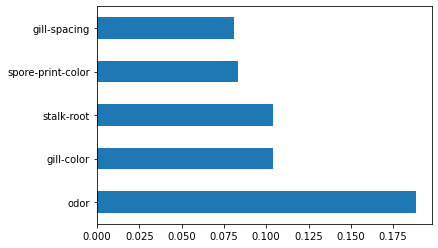

In [111]:
#нарисовать 5 наиболее значимых фичей
(pd.Series(feature_importances, index=X.columns)
   .nlargest(5)
   .plot(kind='barh'))

In [87]:
feature_importances_df.sort_values("feature_importances", ascending = False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [112]:
#посчитать число предсказаний
datatest = pd.read_csv("testing_mush.csv")
datatest.head()
testshrooms = best_clf.predict(datatest)
from collections import Counter
Counter(testshrooms)

Counter({0: 1055, 1: 976})

In [116]:
#создание confmatr
from sklearn.metrics import confusion_matrix
test = pd.read_csv("testing_y_mush.csv")
cmatr = confusion_matrix(testshrooms, test)
cmatr

array([[1055,    0],
       [   0,  976]], dtype=int64)

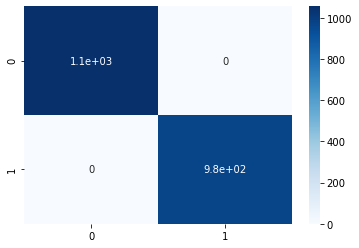

In [118]:
sns.heatmap(cmatr, annot=True, cmap="Blues")

# Другой датасет про жуккеров

In [132]:
data2 = pd.read_csv("invasion.csv")
data2.head()
X2 = data2.drop("class", axis = 1)
y = data2["class"]

In [130]:
data_test = pd.read_csv("invasion_test.csv")
data_test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [133]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X2,y)

RandomForestClassifier(random_state=0)

In [134]:
params = {"n_estimators": range(10,50,10), "max_depth" : range(1,12,2), "min_samples_leaf": range(1,7), "min_samples_split" : range(2,9,2)}
gridsearch = GridSearchCV(rf,params, cv = 3,n_jobs=-1)
gridsearch.fit(X2,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [141]:
gridsearch.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [146]:
newrf = RandomForestClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 10 )
newrf.fit(X2,y)
Counter(newrf.predict(data_test))

Counter({'fighter': 675, 'transport': 595, 'cruiser': 230})

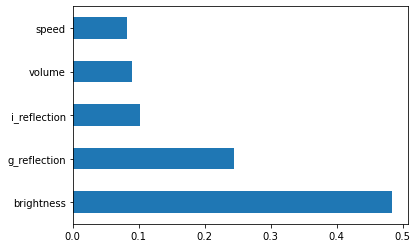

In [148]:
(pd.Series(feature_importances, index=X2.columns)
   .nlargest(5)
   .plot(kind='barh'))